Step 1: Checking for missing values
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Step 2: Displaying dataset information
Dataset shape: (20640, 10)

Feature descriptions:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000

/home/bibek/Desktop/machine_leaning/lapassignment/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5713 - mae: 0.5651 - val_loss: 0.3406 - val_mae: 0.4206
Epoch 2/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3703 - mae: 0.4443 - val_loss: 0.3046 - val_mae: 0.4099
Epoch 3/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3397 - mae: 0.4254 - val_loss: 0.2995 - val_mae: 0.4029
Epoch 4/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3257 - mae: 0.4157 - val_loss: 0.2953 - val_mae: 0.3845
Epoch 5/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3220 - mae: 0.4084 - val_loss: 0.2888 - val_mae: 0.3715
Epoch 6/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3110 - mae: 0.4036 - val_loss: 0.2749 - val_mae: 0.3729
Epoch 7/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2958 - mae: 0.3904 - val_loss: 0.2728 - val_mae: 0.3654
Epoch 8/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2831 - mae: 0.3850 - val_loss: 0.2627 - val_mae: 0.3603
Epoch 9/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

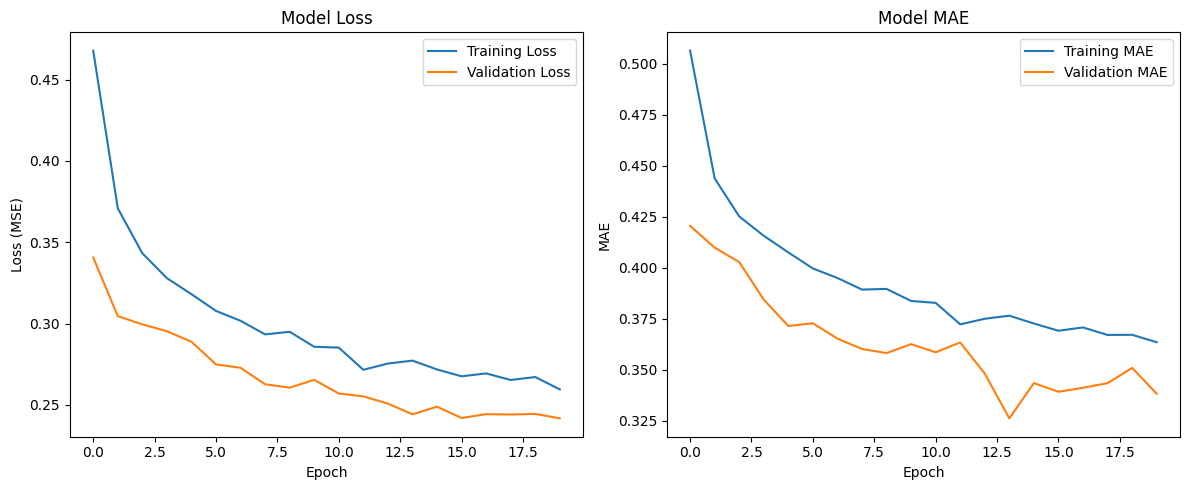

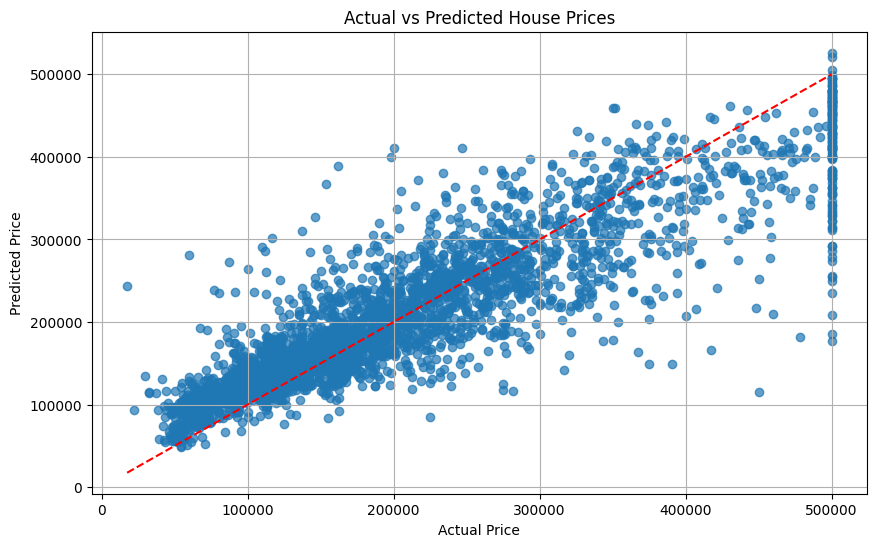

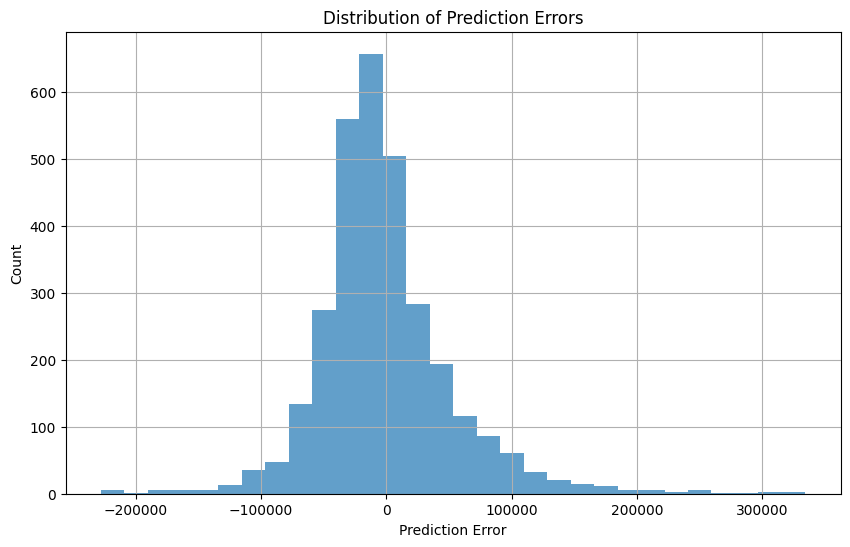

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the California Housing dataset from Kaggle
# https://www.kaggle.com/datasets/camnugent/california-housing-prices
df = pd.read_csv('housing.csv')
price_col = 'median_house_value'  # California Housing price column

# Step 1: Check for missing values and handle if any
print("Step 1: Checking for missing values")
print(df.isnull().sum())

# Handle missing values if any
if df.isnull().sum().sum() > 0:
    # Fill numeric columns with mean values
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        # Avoid chained assignment warning by using loc
        df.loc[:, col] = df[col].fillna(df[col].mean())
    
    print("Missing values after handling:")
    print(df.isnull().sum())

# Step 2: Display input and output features of the dataset
print("\nStep 2: Displaying dataset information")
print(f"Dataset shape: {df.shape}")
print("\nFeature descriptions:")
print(df.describe())

# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Input features and output
X = df.drop(price_col, axis=1)  # Input features (all columns except price)
y = df[price_col]               # Output feature (house price)

print("\nInput features:")
print(X.columns.tolist())
print("\nOutput feature:", price_col)

# Step 3: Handle categorical columns
print("\nStep 3: Handling categorical attributes")
# Check for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")
print(f"Numeric columns: {numeric_cols.tolist()}")

# Set up a column transformer to handle both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply the preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# For categorical features, get the names of one-hot encoded columns
if len(categorical_cols) > 0:
    # Get the one-hot encoded feature names
    cat_encoder = preprocessor.named_transformers_['cat']
    encoded_features = cat_encoder.get_feature_names_out(categorical_cols)
    
    # All feature names (numeric + encoded categorical)
    feature_names = list(numeric_cols) + list(encoded_features)
    print(f"\nProcessed features shape: {X_processed.shape}")
    print(f"Features after one-hot encoding: {len(feature_names)}")
else:
    feature_names = list(numeric_cols)

# Step 4: Scale the output variable
print("\nStep 4: Scaling the output variable")
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

print("Processed features (first 5 samples):")
print(X_processed[:5])
print("\nScaled target (first 5 samples):")
print(y_scaled[:5])

# Step 5: Split dataset into training/validation/test sets in 70:15:15 ratio
print("\nStep 5: Splitting dataset into training/validation/test sets in 70:15:15 ratio")

# First split: 70% training, 30% remaining
X_train, X_temp, y_train, y_temp = train_test_split(
    X_processed, y_scaled, test_size=0.3, random_state=42
)

# Second split: Split the remaining 30% into 15% validation and 15% test (which is 50% of the 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 6: Construct an MLP with configuration [input]x128x64x32x16x1
print("\nStep 6: Constructing MLP model")
# Note: input size now includes one-hot encoded features

# Create the MLP model
model = Sequential([
    # Input layer - using X_train.shape[1] for proper input size with encoded features
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding dropout for regularization
    
    # Hidden layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    # Output layer (linear activation for regression)
    Dense(1, activation='linear')
])

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']  # Mean Absolute Error
)

# Display model summary
model.summary()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,  # More epochs with early stopping
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Step 7: Predict house price for test data
print("\nStep 7: Predicting house prices for test data")
y_pred_scaled = model.predict(X_test).flatten()

# Step 8: Perform inverse transformation of predicted and actual house price
print("\nStep 8: Performing inverse transformation of predicted and actual house prices")
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Display actual vs predicted prices for first few samples
comparison_df = pd.DataFrame({
    'Actual Price': y_test_actual,
    'Predicted Price': y_pred,
    'Difference': y_test_actual - y_pred
})
print("\nActual vs Predicted Prices (first 10 samples):")
print(comparison_df.head(10))

# Step 9: Compute and display RMSE, MAE and MAPE
print("\nStep 9: Computing RMSE, MAE, and MAPE")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
# Adding small epsilon to avoid division by zero
mape = np.mean(np.abs((y_test_actual - y_pred) / (y_test_actual + 1e-10))) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.7)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

# Plot prediction error distribution
plt.figure(figsize=(10, 6))
errors = y_test_actual - y_pred
plt.hist(errors, bins=30, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.savefig('error_distribution.png')
plt.show()